# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Burden_of_Mental_Illness
### 1.2 Fragestellung:
- Welche psychische Krankheit ist zahlenmässig zwischen 1990 und 2021 am meisten gestiegen?
- Welche Krankheit ist am weitesten verbreitet?
### 1.3 Datenquelle(n):

https://ourworldindata.org/burden-of-disease

https://ourworldindata.org/burden-of-disease#the-burden-from-non-communicable-diseases-by-sub-category

https://vizhub.healthdata.org/gbd-results/




### 1.4 Daten beschaffen und laden

In [4]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
import pandas as pd
df = pd.read_csv("mental_disorders_global_1990_2021.csv", sep=";")

df.head() 



,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,558,Mental disorders,1,Number,1990,8.363150e+07,1.052900e+08,6.026368e+07
1,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,558,Mental disorders,2,Percent,1990,3.042552e-02,3.701543e-02,2.294135e-02
2,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,558,Mental disorders,3,Rate,1990,1.567278e+03,1.973165e+03,1.129359e+03
3,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,559,Schizophrenia,1,Number,1990,9.533395e+06,1.202186e+07,6.941600e+06
4,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,22,All ages,559,Schizophrenia,2,Percent,1990,3.476355e-03,4.342438e-03,2.516988e-03


Die Tabelle zeigt einen ersten Überblick über die Struktur des Datensatzes sowie die enthaltenen Variablen.


## 2. Daten vorbereiten

- Der Datensatz liegt im **Long-Format** vor, d. h. jede Zeile beschreibt eine Kombination aus Jahr, psychischer Erkrankung, Region und Messwert.
- Für die Analyse wird die Krankheitslast in **DALYs (Disability-Adjusted Life Years)** betrachtet.
- Die Daten werden auf die globale Ebene (**Global**), beide Geschlechter (**Both**) und alle Altersgruppen (**All ages**) eingeschränkt.
- Für Zeitvergleiche und übersichtliche Darstellungen wird der Datensatz anschließend ins **Wide-Format** überführt, wobei die Erkrankungen die Zeilen und die Jahre die Spalten darstellen.


In [6]:
df_dalys = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number")
]

df_pivot = df_dalys.pivot(index="cause_name", columns="year", values="val")
df_pivot.head()


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cause_name,,,,,,,,,,,,,,,,,,,,,
Anxiety disorders,2.161264e+07,2.196384e+07,2.232432e+07,2.269850e+07,2.308172e+07,2.347458e+07,2.387709e+07,2.428752e+07,2.470914e+07,2.513469e+07,...,3.031671e+07,3.094012e+07,3.169491e+07,3.257474e+07,3.344007e+07,3.434719e+07,3.524388e+07,3.619555e+07,4.430480e+07,4.559915e+07
Attention-deficit/hyperactivity disorder,2.845618e+06,2.914066e+06,2.976740e+06,3.032728e+06,3.079116e+06,3.114712e+06,3.143605e+06,3.167991e+06,3.189721e+06,3.207618e+06,...,3.440771e+06,3.475789e+06,3.508311e+06,3.534027e+06,3.553405e+06,3.574883e+06,3.598955e+06,3.624443e+06,3.647554e+06,3.676544e+06
Autism spectrum disorders,5.677258e+06,5.769007e+06,5.859538e+06,5.951636e+06,6.041845e+06,6.130455e+06,6.221813e+06,6.319107e+06,6.416365e+06,6.519708e+06,...,8.176615e+06,8.333165e+06,8.490588e+06,8.646946e+06,8.803837e+06,8.965487e+06,9.128820e+06,9.286879e+06,9.417911e+06,9.553207e+06
Bipolar disorder,4.552571e+06,4.634308e+06,4.716257e+06,4.801431e+06,4.885020e+06,4.970033e+06,5.055646e+06,5.142794e+06,5.231615e+06,5.322330e+06,...,6.609121e+06,6.705235e+06,6.800064e+06,6.895951e+06,6.991508e+06,7.088312e+06,7.182673e+06,7.281986e+06,7.352909e+06,7.426966e+06
Conduct disorder,3.754322e+06,3.786870e+06,3.819806e+06,3.859165e+06,3.902494e+06,3.950983e+06,4.002629e+06,4.054914e+06,4.103140e+06,4.145432e+06,...,4.311621e+06,4.351125e+06,4.392674e+06,4.433210e+06,4.473072e+06,4.519898e+06,4.574092e+06,4.626676e+06,4.672887e+06,4.718556e+06


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [7]:
df.dtypes  #Datentypen

measure_id         int64
measure_name      object
location_id        int64
location_name     object
sex_id             int64
sex_name          object
age_id             int64
age_name          object
cause_id           int64
cause_name        object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object

**Datentypen**

Die meisten Identifikationsvariablen (IDs, Jahr) liegen als Ganzzahlen (`int64`) vor.  
Kategorische Variablen wie Erkrankung, Geschlecht oder Altersgruppe sind als Text (`object`) gespeichert.  

Die Zielvariable `val` (DALYs) liegt als numerischer Gleitkommawert (`float64`) vor und eignet sich damit für statistische Auswertungen und Visualisierungen.


In [8]:
df["cause_name"].nunique(), df["location_name"].nunique(), df["year"].nunique(), df["sex_name"].nunique(), df["age_name"].nunique()



(11, 1, 32, 1, 1)

**Kategorien und Datenpunkte**

Der Datensatz umfasst 11 verschiedene psychische Erkrankungen.  
Für jede Erkrankung liegen gleich viele Datenpunkte (96) vor, was auf eine konsistente Zeitabdeckung über alle Jahre hinweist.  
Dies ermöglicht faire Vergleiche zwischen den einzelnen Krankheitskategorien.


### 3.1 Analyse Erkrankungen


In [9]:
df["cause_name"].value_counts()


cause_name
Mental disorders                                    96
Schizophrenia                                       96
Anxiety disorders                                   96
Eating disorders                                    96
Autism spectrum disorders                           96
Attention-deficit/hyperactivity disorder            96
Conduct disorder                                    96
Idiopathic developmental intellectual disability    96
Other mental disorders                              96
Depressive disorders                                96
Bipolar disorder                                    96
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro psychischer Erkrankung'}, xlabel='cause_name', ylabel='Anzahl Datenpunkte'>

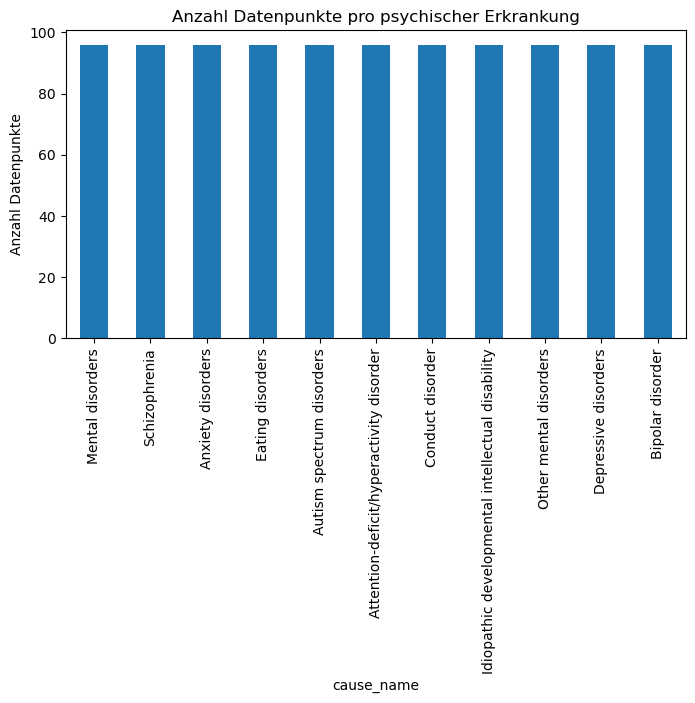

In [17]:
df["cause_name"].value_counts().plot(
    kind="bar",
    figsize=(8,4),
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro psychischer Erkrankung"
)


Das Balkendiagramm zeigt, dass für jede psychische Erkrankung gleich viele Datenpunkte vorliegen.
Dies bestätigt die gleichmäßige Struktur des Datensatzes.


In [10]:
len(df)

1056

In [11]:
df.isna().sum() # Fehlende Werte 



measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

**Fehlende Werte**

Es wurden keine fehlenden Werte im gesamten Datensatz festgestellt.  
Auch in den für die Analyse relevanten Spalten (`year`, `cause_name`, `location_name`, `val`) sind alle Einträge vollständig.  

Eine zusätzliche Datenbereinigung war daher nicht notwendig.


In [12]:
df[["year", "cause_name", "location_name", "val"]].isna().sum()


year             0
cause_name       0
location_name    0
val              0
dtype: int64

Der Datensatz umfasst insgesamt 1056 Datenpunkte. Es wurden keine fehlenden Werte festgestellt, weder im gesamten Datensatz noch in den für die Analyse relevanten Spalten (year, cause_name, location_name, val). Die Daten sind vollständig und können ohne Bereinigung weiterverwendet werden.

### 3.2 Analyse : Durchschnittliche Krankheitslast nach psychischer Erkrankung


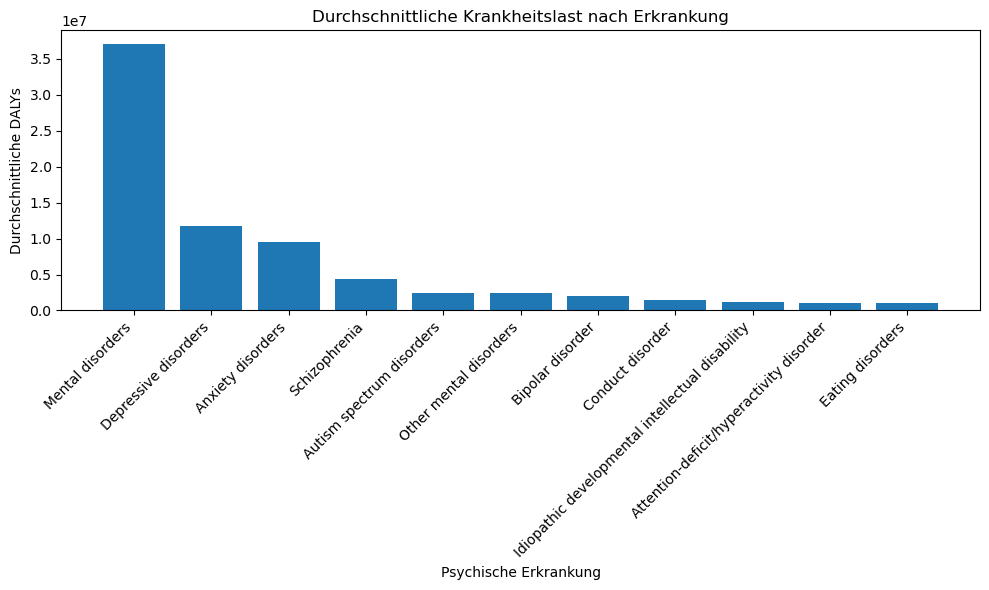

In [13]:
import matplotlib.pyplot as plt

mean_by_disease = df.groupby("cause_name")["val"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(mean_by_disease.index, mean_by_disease.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Psychische Erkrankung")
plt.ylabel("Durchschnittliche DALYs")
plt.title("Durchschnittliche Krankheitslast nach Erkrankung")
plt.tight_layout()
plt.show()


Das Diagramm zeigt die durchschnittliche Krankheitslast (DALYs) für verschiedene psychische Erkrankungen über den gesamten betrachteten Zeitraum.  
Dabei weist die Kategorie **Mental disorders** die höchste durchschnittliche Krankheitslast auf, da sie eine Sammelkategorie für mehrere psychische Erkrankungen darstellt.

Unter den spezifischen Erkrankungen zeigen **Depressive disorders** und **Anxiety disorders** die höchsten durchschnittlichen DALY-Werte.  
Erkrankungen wie **Eating disorders**, **Attention-deficit/hyperactivity disorder** und **Idiopathic developmental intellectual disability** weisen im Vergleich deutlich niedrigere durchschnittliche Werte auf.


### 3.3 Analyse : Zeitliche Entwicklung der Krankheitslast (1990–2020)


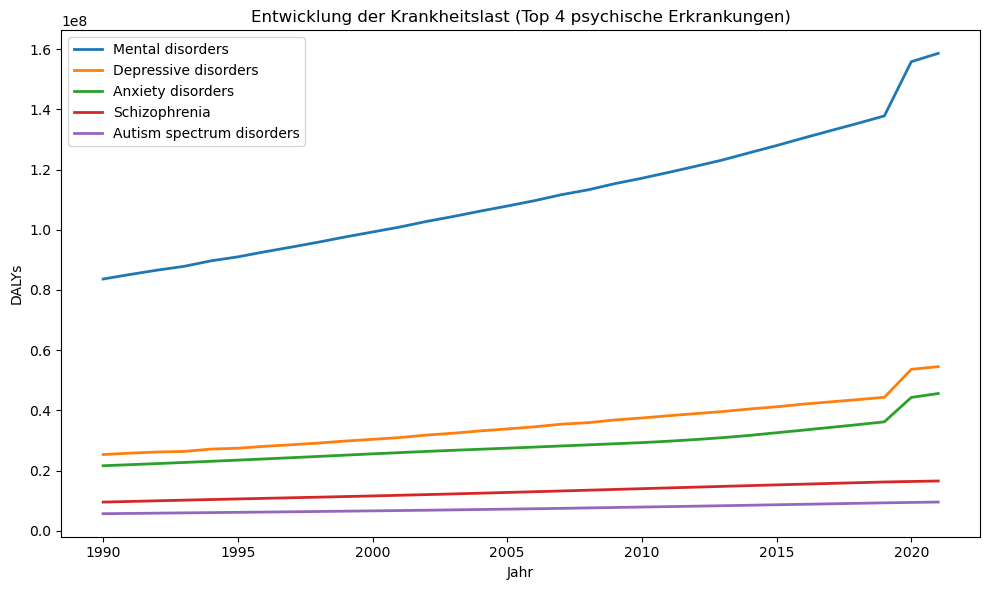

In [14]:
import matplotlib.pyplot as plt

df_global = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number")
]

top5 = df_global.groupby("cause_name")["val"].mean().nlargest(5).index
df_top = df_global[df_global["cause_name"].isin(top5)]

plt.figure(figsize=(10,6))

for krankheit in top5:
    daten = df_top[df_top["cause_name"] == krankheit].sort_values("year")
    plt.plot(daten["year"], daten["val"], label=krankheit, linewidth=2)

plt.xlabel("Jahr")
plt.ylabel("DALYs")
plt.title("Entwicklung der Krankheitslast (Top 4 psychische Erkrankungen)")
plt.legend()
plt.tight_layout()
plt.show()

# mental disorder ist die gesamt kateogarie von alle  Psychische krankheiten die auf dem diagram dargestellt sind und noch weitere.




### 3.4 Analyse: Krankheits psychischer Erkrankungen im Jahr 2020 (global)

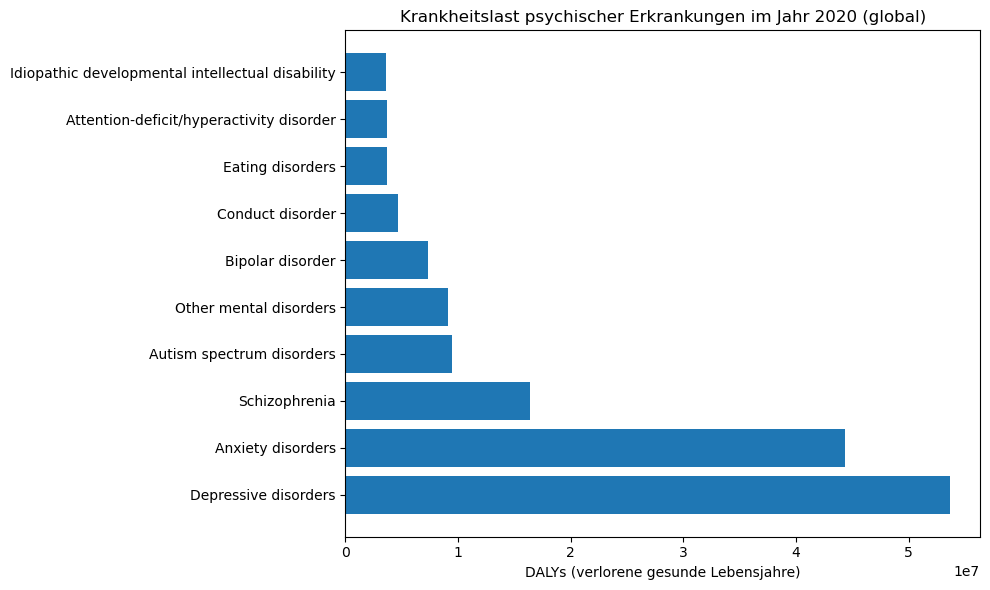

In [15]:
import matplotlib.pyplot as plt

df_2020 = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number") &
    (df["year"] == 2020)
]

df_2020 = df_2020[df_2020["cause_name"] != "Mental disorders"]
df_2020 = df_2020.sort_values("val", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_2020["cause_name"], df_2020["val"])
plt.xlabel("DALYs (verlorene gesunde Lebensjahre)")
plt.title("Krankheitslast psychischer Erkrankungen im Jahr 2020 (global)")
plt.tight_layout()
plt.show()



Das Balkendiagramm zeigt die Krankheitslast (DALYs) verschiedener psychischer
Erkrankungen im Jahr 2020 auf globaler Ebene.

Im Jahr 2020 weisen *Depressive disorders* und *Anxiety disorders*
die höchste Krankheitslast auf, während Erkrankungen wie
*Eating disorders* oder *ADHD* deutlich geringere DALY-Werte zeigen.
Dies verdeutlicht die dominante Rolle affektiver Störungen
für die globale Krankheitslast im betrachteten Jahr.


## 4. Analyse 





In diesem Abschnitt wird die Krankheitslast (DALYs) psychischer Erkrankungen
auf globaler Ebene analysiert. Betrachtet werden sowohl Unterschiede zwischen
Erkrankungen als auch zeitliche Veränderungen zwischen 1990 und 2020.



### Beobachtungen

- Die Krankheitslast psychischer Erkrankungen hat global insgesamt zugenommen.
- Depressive Störungen weisen die höchste Krankheitslast auf und zeigen zugleich
  den stärksten absoluten Anstieg.
- Seit etwa 2019 ist ein deutlicher Anstieg bei Angststörungen und Depressionen
  zu beobachten.
- Die Krankheitslast von Schizophrenie bleibt über den betrachteten Zeitraum
  vergleichsweise konstant.

### Interpretation

Der beobachtete Anstieg psychischer Erkrankungen könnte teilweise durch eine
zunehmende Enttabuisierung und verbesserte Diagnostik erklärt werden.
Insbesondere bei Depressionen und Angststörungen spielen Umwelt- und
Gesellschaftsfaktoren wie Urbanisierung, Leistungsdruck und soziale
Unsicherheiten eine wichtige Rolle.

Die vergleichsweise konstante Krankheitslast bei Schizophrenie deutet darauf hin,
dass genetische Faktoren eine größere Rolle spielen und externe Einflüsse
weniger stark wirken als bei affektiven Störungen.

Zusätzlich ist zu beachten, dass der starke Anstieg zwischen 2019 und 2020
teilweise mit der COVID-19-Pandemie in Zusammenhang stehen könnte.
Pandemiebedingte Faktoren wie soziale Isolation, wirtschaftliche Unsicherheit
und eingeschränkter Zugang zu psychosozialer Versorgung haben insbesondere
Depressionen und Angststörungen verstärkt.


### Berechnungen 

In [19]:
# Berechnungen 

import pandas as pd
import matplotlib.pyplot as plt

df_global = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number") &
    (df["year"] <= 2020)
]

df_global["year"].min(), df_global["year"].max()




(1990, 2020)

In [20]:
df_1990 = df_global[df_global["year"] == 1990][["cause_name", "val"]]
df_2020 = df_global[df_global["year"] == 2020][["cause_name", "val"]]

vergleich = df_1990.merge(df_2020, on="cause_name", suffixes=("_1990", "_2020"))
vergleich["anstieg"] = vergleich["val_2020"] - vergleich["val_1990"]

vergleich = vergleich[vergleich["cause_name"] != "Mental disorders"]
vergleich.sort_values("anstieg", ascending=False)

,cause_name,val_1990,val_2020,anstieg
9,Depressive disorders,2.533614e+07,5.363977e+07,2.830363e+07
2,Anxiety disorders,2.161264e+07,4.430480e+07,2.269216e+07
1,Schizophrenia,9.533395e+06,1.638520e+07,6.851810e+06
8,Other mental disorders,5.198699e+06,9.073357e+06,3.874658e+06
4,Autism spectrum disorders,5.677258e+06,9.417911e+06,3.740653e+06
10,Bipolar disorder,4.552571e+06,7.352909e+06,2.800338e+06
3,Eating disorders,2.245120e+06,3.695490e+06,1.450370e+06
6,Conduct disorder,3.754322e+06,4.672887e+06,9.185649e+05
5,Attention-deficit/hyperactivity disorder,2.845618e+06,3.647554e+06,8.019361e+05
7,Idiopathic developmental intellectual disability,2.875732e+06,3.632514e+06,7.567818e+05


### Anstieg der Krankheitslast psychischer Erkrankungen (1990–2020)

Die Tabelle zeigt die DALY-Werte (verlorene gesunde Lebensjahre) für verschiedene psychische Erkrankungen in den Jahren 1990 und 2020 sowie den absoluten Anstieg über diesen Zeitraum.

Es ist erkennbar, dass **Depressive disorders** den stärksten absoluten Anstieg aufweisen. Die DALYs haben sich von rund 25 Millionen im Jahr 1990 auf über 53 Millionen im Jahr 2020 erhöht. Auch **Angststörungen** zeigen einen starken Anstieg und stellen die zweitgrösste Zunahme dar.

Im Vergleich dazu ist der Anstieg bei **Schizophrenie**, **bipolaren Störungen** und anderen psychischen Erkrankungen deutlich geringer. Dies deutet darauf hin, dass insbesondere Depressionen und Angststörungen zunehmend zur globalen Krankheitslast beitragen.

Welche psychische Krankheit ist zwischen 1990 und 2020 am meisten gestiegen?

Depressive disorders, gefolgt von Anxiety disorders


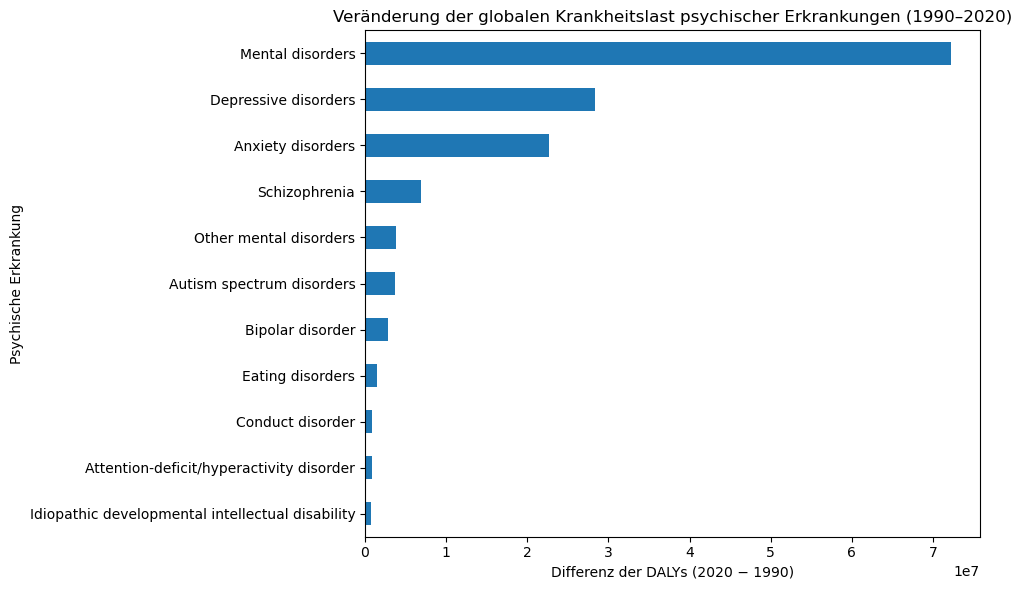

In [20]:
plt.figure(figsize=(10,6))
diff_1990_2020.sort_values().plot(kind="barh")
plt.xlabel("Differenz der DALYs (2020 − 1990)")
plt.ylabel("Psychische Erkrankung")
plt.title("Veränderung der globalen Krankheitslast psychischer Erkrankungen (1990–2020)")
plt.tight_layout()
plt.show()


In [ ]:
# -----------------------
# Berechnungen (1990–2020)
# -----------------------
import pandas as pd
import matplotlib.pyplot as plt

# 1) Filter: globale Daten, DALYs, beide Geschlechter, alle Altersgruppen, absolute Werte ("Number")
df_global = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["location_name"] == "Global") &
    (df["sex_name"] == "Both") &
    (df["age_name"] == "All ages") &
    (df["metric_name"] == "Number") &
    (df["year"].isin([1990, 2020]))
].copy()

# 2) Werte je Ursache & Jahr holen (1990 vs 2020)
df_1990 = df_global[df_global["year"] == 1990][["cause_name", "val"]].rename(columns={"val": "val_1990"})
df_2020 = df_global[df_global["year"] == 2020][["cause_name", "val"]].rename(columns={"val": "val_2020"})

vergleich = df_1990.merge(df_2020, on="cause_name", how="inner")
vergleich["diff_1990_2020"] = vergleich["val_2020"] - vergleich["val_1990"]


vergleich = vergleich[vergleich["cause_name"] != "Mental disorders"]

# 3) Tabelle sortiert anzeigen (grösste Anstiege oben)
vergleich_sorted = vergleich.sort_values("diff_1990_2020", ascending=False)
vergleich_sorted


,cause_name,val_1990,val_2020,diff_1990_2020
9,Depressive disorders,2.533614e+07,5.363977e+07,2.830363e+07
2,Anxiety disorders,2.161264e+07,4.430480e+07,2.269216e+07
1,Schizophrenia,9.533395e+06,1.638520e+07,6.851810e+06
8,Other mental disorders,5.198699e+06,9.073357e+06,3.874658e+06
4,Autism spectrum disorders,5.677258e+06,9.417911e+06,3.740653e+06
10,Bipolar disorder,4.552571e+06,7.352909e+06,2.800338e+06
3,Eating disorders,2.245120e+06,3.695490e+06,1.450370e+06
6,Conduct disorder,3.754322e+06,4.672887e+06,9.185649e+05
5,Attention-deficit/hyperactivity disorder,2.845618e+06,3.647554e+06,8.019361e+05
7,Idiopathic developmental intellectual disability,2.875732e+06,3.632514e+06,7.567818e+05



Für jede psychische Erkrankung wurden die DALYs (Global, beide Geschlechter, alle Altersgruppen) zwischen 1990 und 2020 verglichen.
Dazu wurde die absolute Differenz berechnet: **Δ = DALYs(2020) − DALYs(1990)**.

Die Tabelle zeigt die DALY-Werte für 1990 und 2020 sowie die daraus resultierende Veränderung.
Im Diagramm werden die **3 stärksten** und **3 schwächsten** Veränderungen dargestellt, um die wichtigsten Unterschiede übersichtlich zu visualisieren.


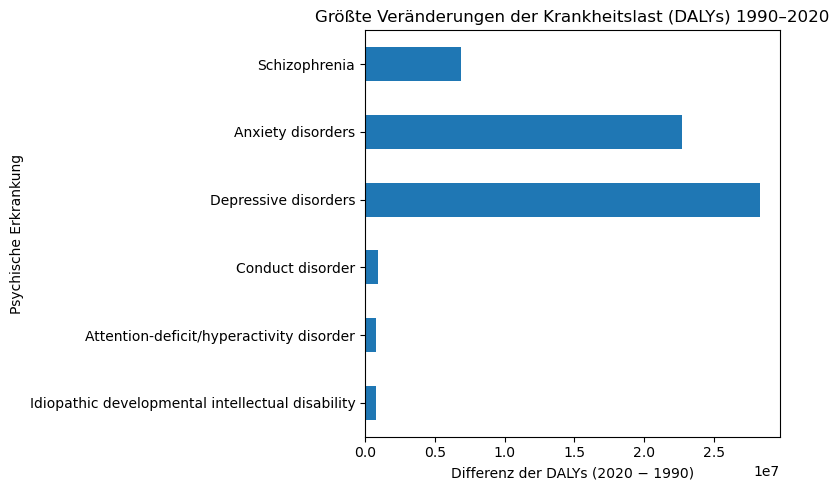

In [23]:
top_bottom = pd.concat([
    vergleich.sort_values("diff_1990_2020").head(3),
    vergleich.sort_values("diff_1990_2020", ascending=False).head(3)
])

top_bottom.set_index("cause_name")["diff_1990_2020"].plot(
    kind="barh",
    figsize=(8,5),
    title="Größte Veränderungen der Krankheitslast (DALYs) 1990–2020"
)

plt.xlabel("Differenz der DALYs (2020 − 1990)")
plt.ylabel("Psychische Erkrankung")
plt.tight_layout()
plt.show()

### Visualisierung

Das Balkendiagramm visualisiert die größten absoluten Veränderungen der globalen 
Krankheitslast (DALYs) zwischen 1990 und 2020. Dargestellt sind die drei psychischen 
Erkrankungen mit dem stärksten sowie die drei mit dem geringsten Anstieg.

Es zeigt sich deutlich, dass **depressive Störungen** den höchsten absoluten Zuwachs 
aufweisen, gefolgt von **Angststörungen**. Demgegenüber fallen die Veränderungen bei 
Erkrankungen wie **ADHS**, **Conduct disorder** und **idiopathischer intellektueller 
Entwicklungsstörung** vergleichsweise gering aus.

Die Visualisierung ergänzt die tabellarische Auswertung und ermöglicht einen schnellen, 
übersichtlichen Vergleich der wichtigsten Veränderungen im betrachteten Zeitraum.
